In [111]:
import pandas as pd

In [112]:
# Wczytaj plik EURUSD30.csv (źródło: Kaggle). Kolejne kolumny to: DateTime, Open, High, Low, Close, Volume.
df = pd.read_csv('data/EURUSD30.csv', sep='\t')
df.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [113]:
df

,DateTime,Open,High,Low,Close,Volume
0,2017-12-13 11:00,1.17512,1.17514,1.17441,1.17443,4270
1,2017-12-13 11:30,1.17442,1.17444,1.17381,1.17393,4540
2,2017-12-13 12:00,1.17392,1.17427,1.17334,1.17351,5130
3,2017-12-13 12:30,1.17351,1.17401,1.17300,1.17401,5204
4,2017-12-13 13:00,1.17398,1.17409,1.17294,1.17353,4958
...,...,...,...,...,...,...
49994,2021-12-20 11:30,1.12723,1.12767,1.12681,1.12703,1144
49995,2021-12-20 12:00,1.12704,1.12765,1.12683,1.12713,1345
49996,2021-12-20 12:30,1.12714,1.12746,1.12680,1.12685,1589
49997,2021-12-20 13:00,1.12684,1.12778,1.12684,1.12768,2231


In [114]:
# Odfiltruj wiersze z brakującymi danymi
df.isnull().sum()

DateTime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [115]:
# Utwórz DataFrame zawierające te same dane, ale w ujęciu dziennym.

df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date'] = df['DateTime'].dt.date

grouped_data = df.groupby('Date').agg(
    {'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'})

In [116]:
grouped_data

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-13,1.17512,1.18404,1.17294,1.18361,155056
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500
2017-12-18,1.17432,1.18342,1.17420,1.17837,199846
...,...,...,...,...,...
2021-12-15,1.12575,1.12991,1.12215,1.12902,114369
2021-12-16,1.12903,1.13603,1.12811,1.13336,81934
2021-12-17,1.13335,1.13488,1.12350,1.12370,71994


In [117]:
# Utwórz serię danych zawierającą procentowy wzrost (lub spadek) kursu w danym dniu (jako różnicę Open i Close).
grouped_data['PercentChange'] = ((grouped_data['Close'] - grouped_data['Open']) / grouped_data['Open']) * 100

# grouped_data['PercentChange'] = grouped_data['PercentChange'].round(2).astype(str) + '%'
# grouped_data

grouped_data[['Open', 'High', 'Low', 'Close', 'Volume', 'PercentChange']]

,Open,High,Low,Close,Volume,PercentChange
Date,,,,,,
2017-12-13,1.17512,1.18404,1.17294,1.18361,155056,0.722479
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280,-0.520442
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462,-0.214871
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500,-0.007663
2017-12-18,1.17432,1.18342,1.17420,1.17837,199846,0.344880
...,...,...,...,...,...,...
2021-12-15,1.12575,1.12991,1.12215,1.12902,114369,0.290473
2021-12-16,1.12903,1.13603,1.12811,1.13336,81934,0.383515
2021-12-17,1.13335,1.13488,1.12350,1.12370,71994,-0.851458


In [118]:
# Oblicz średnią i odchylenie standardowe tej kolumny oraz narysuj histogram.
mean_value = grouped_data['PercentChange'].mean()
std_dev = grouped_data['PercentChange'].std()

print(f"Average percentage change: {mean_value:.4f}%")
print(f"Standard deviation of percentage change: {std_dev:.4f}%")

Average percentage change: -0.0023%
Standard deviation of percentage change: 0.3677%


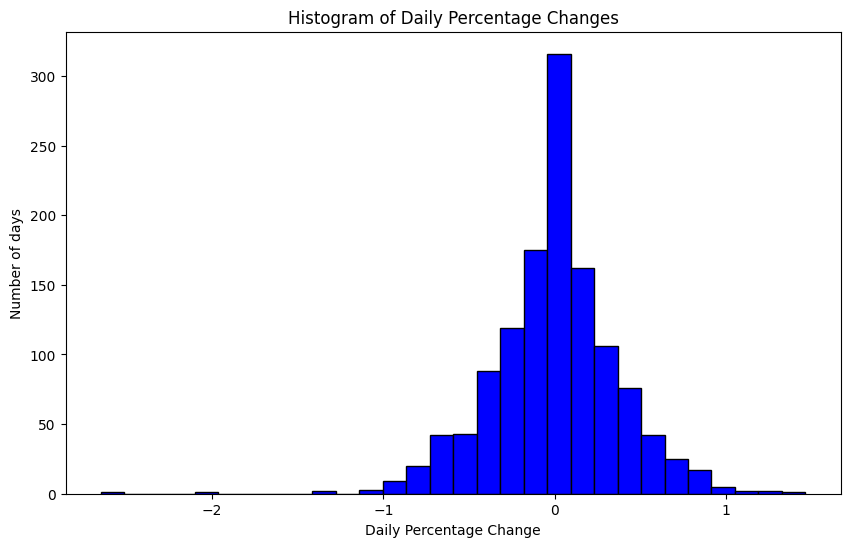

In [119]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.hist(grouped_data['PercentChange'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Daily Percentage Changes')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Number of days')
plt.show()